PRIMEIRAS ANÁLISES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('salario_profissionais_dados.csv', sep=',', header=0)

In [11]:
###CABEÇALHO_DO_DATASET###
df.head(5)

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [12]:
###PRINCIPAIS_INFORMAÇÕES_DO_DATASET###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [13]:
###TIPOS_DE_DADOS###
df.dtypes.value_counts()

object    7
int64     3
Name: count, dtype: int64

In [14]:
###VALORES_NULOS_POR_CATEGORIAS###
df.isnull().sum()

work_year              0
country                0
region                 0
experience_level       0
job_title              0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
years_of_experience    0
dtype: int64

FREQUÊNCIA E DISTRIBUIÇÃO DAS CATEGORIAS

In [15]:
###Selecionando_as_categoricas###
df_sel = df[["experience_level",
             "job_title",
             "company_size",
             "salary_in_usd",
             "employee_residence",
             "work_year",
             "years_of_experience"]]

In [16]:
###criando_uma_lista_python###
categoricas = df_sel.select_dtypes(include=['object','category','bool']).columns.tolist()
categoricas

['experience_level', 'job_title', 'company_size', 'employee_residence']

In [17]:
###Top_10_Cargos_mais_comuns_no_Dataset_em_%###
df_sel["job_title"].value_counts(normalize=True).head(10).round(2)

job_title
Data Engineer                0.28
Data Scientist               0.22
Data Analyst                 0.16
Machine Learning Engineer    0.08
Analytics Engineer           0.03
Data Architect               0.03
Research Scientist           0.02
Applied Scientist            0.02
Data Science Manager         0.02
Research Engineer            0.01
Name: proportion, dtype: float64

In [18]:
###Tamanhos_das_empresas_mais_comuns_no_Dataset_%###
df_sel["company_size"].value_counts(normalize=True).round(2)

company_size
M    0.84
L    0.12
S    0.04
Name: proportion, dtype: float64

In [19]:
###Nivel de experiencia mais comuns no Dataset em %###
df_sel["experience_level"].value_counts(normalize=True).round(2)

experience_level
SE    0.67
MI    0.21
EN    0.09
EX    0.03
Name: proportion, dtype: float64

ESTÁTISTICAS DESCRITIVAS

In [20]:
###SELECIONANDO_A_VARIAVEL_NUMERICA###
numericas = df_sel.select_dtypes(include=['number']).columns.tolist()
numericas

['salary_in_usd', 'work_year', 'years_of_experience']

In [21]:
###MEDIA_DO_SALÁRIO_EM_USD###
media = df_sel["salary_in_usd"].mean()
print(f"Média salarial (USD): {media:,.2f}")

Média salarial (USD): 137,570.39


In [22]:
###MEDIANA_SALARIAL_EM_USD###
mediana = df_sel["salary_in_usd"].median()
print(f"Mediana salarial (USD): {mediana:,.2f}")

Mediana salarial (USD): 135,000.00


In [23]:
###MEDIDA_DE_DISPERSÃO###
desvio_padrao = df_sel["salary_in_usd"].std()
minimo = df_sel["salary_in_usd"].min()
maximo = df_sel["salary_in_usd"].max()

In [24]:
print(f"Desvio padrão: {desvio_padrao:,.2f}")
print(f"mínimo salárial: {minimo:,.2f}")
print(f"máximo salárial: {maximo:,.2f}")
print("-" * 50)

Desvio padrão: 63,055.63
mínimo salárial: 5,132.00
máximo salárial: 450,000.00
--------------------------------------------------


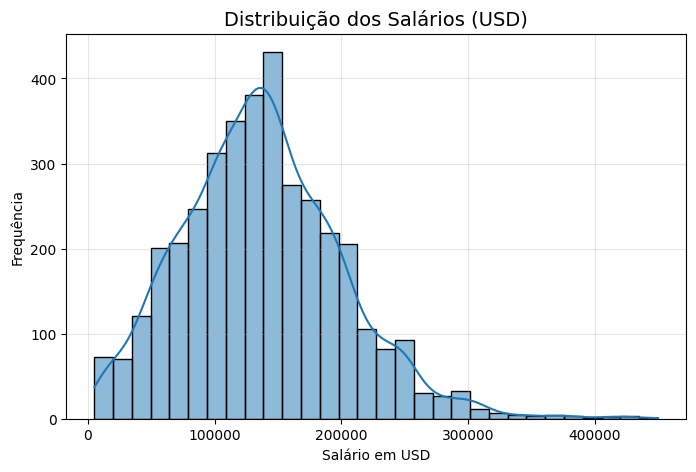

In [25]:
###HISTOGRAMA_DISTRIBUIÇÃO_DOS_SALARIOS###
plt.figure(figsize=(8, 5))
sns.histplot(df_sel["salary_in_usd"], bins=30, kde=True)
plt.title("Distribuição dos Salários (USD)", fontsize=14)
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\luisn\AppData\Local\Temp\ipykernel_16972\2151037139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


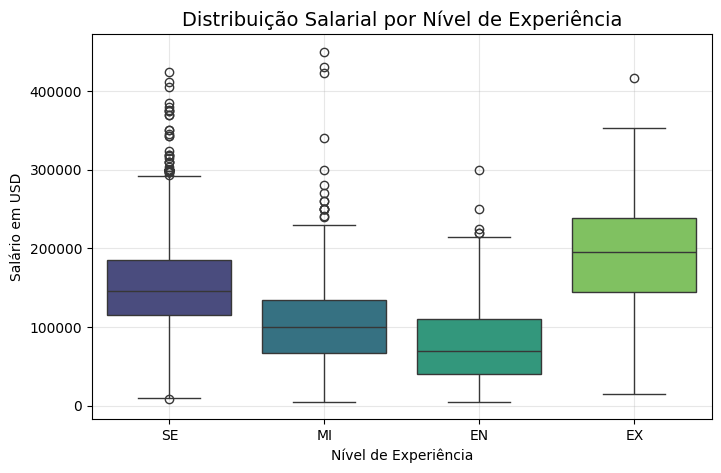

In [26]:
###BOXPLOT_DISTRIBUIÇÃO_POR_NIVEL_DE_EXPERIENCIA###
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="experience_level",
    y="salary_in_usd",
    data=df_sel,
    palette="viridis"
)
plt.title("Distribuição Salarial por Nível de Experiência", fontsize=14)
plt.xlabel("Nível de Experiência")
plt.ylabel("Salário em USD")
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
####COMPARAÇÃO_SALARIAL_POR_NIVEL_DE_EXPERIENCIA###
media_por_experiencia = (
    df_sel.groupby("experience_level")["salary_in_usd"]
    .mean()
    .reset_index()
    .rename(columns={
        "experience_level": "Nível de Experiência",
        "salary_in_usd": "Média Salarial (USD)"
    })
)

# Ordenar do maior para o menor
media_por_experiencia = media_por_experiencia.sort_values(
    by="Média Salarial (USD)",
    ascending=False
)

# Formatar os valores para 2 casas decimais com separador de milhar
media_por_experiencia["Média Salarial (USD)"] = media_por_experiencia["Média Salarial (USD)"].apply(
    lambda x: f"${x:,.2f}"
)

print("\nMédia salarial por nível de experiência:")
print(media_por_experiencia.to_string(index=False))



Média salarial por nível de experiência:
Nível de Experiência Média Salarial (USD)
                  EX          $194,930.93
                  SE          $153,051.07
                  MI          $104,525.94
                  EN           $78,546.28


COMPARAÇÕES POR PAÍS

In [28]:
###MEDIA_POR_PAIS###
media_por_pais=(df_sel.groupby("employee_residence")["salary_in_usd"]
                .mean()
                .reset_index())

In [29]:
###ORDERNAR_DO_MAIOR_PARA_O_MENOR###
media_por_pais = media_por_pais.sort_values(by="salary_in_usd", ascending=False)
top_10_paises = media_por_pais.head(10)
top_10_paises["salary_in_usd"] = top_10_paises["salary_in_usd"].apply(lambda x: f"${x:,.2f}")

C:\Users\luisn\AppData\Local\Temp\ipykernel_16972\103408917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_paises["salary_in_usd"] = top_10_paises["salary_in_usd"].apply(lambda x: f"${x:,.2f}")


In [30]:
print("\nTop 10 países com maiores médias salariais:")
print(top_10_paises.to_string(index=False))


Top 10 países com maiores médias salariais:
employee_residence salary_in_usd
                IL   $423,834.00
                MY   $200,000.00
                PR   $166,000.00
                US   $152,822.01
                CA   $132,222.91
                CN   $125,404.00
                NZ   $125,000.00
                BA   $120,000.00
                IE   $114,943.43
                DO   $110,000.00


CORRELAÇÕES E TENDÊNCIA

In [31]:
###SELECIONANDO_AS_COLUNAS_QUANTITATIVAS_RELEVANTES###
cols_corr = ["salary_in_usd", "work_year", "years_of_experience"]
df_corr = df_sel[cols_corr]

In [32]:
###MATRIZ_CORRELAÇÃO###
matriz_corr = df_corr.corr(method="pearson")
print("\nMatriz de Correlação:")
print(matriz_corr)


Matriz de Correlação:
                     salary_in_usd  work_year  years_of_experience
salary_in_usd             1.000000   0.228290             0.410723
work_year                 0.228290   1.000000             0.178878
years_of_experience       0.410723   0.178878             1.000000


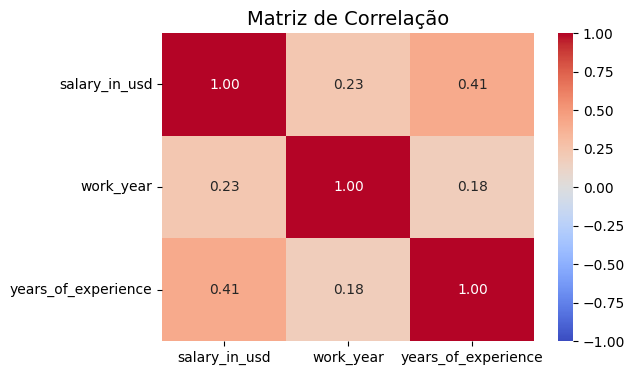

In [33]:
###HEATMAP_MATRIZ_CORRELAÇÃO###
plt.figure(figsize=(6, 4))
sns.heatmap(
    matriz_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1
)
plt.title("Matriz de Correlação", fontsize=14)
plt.show()

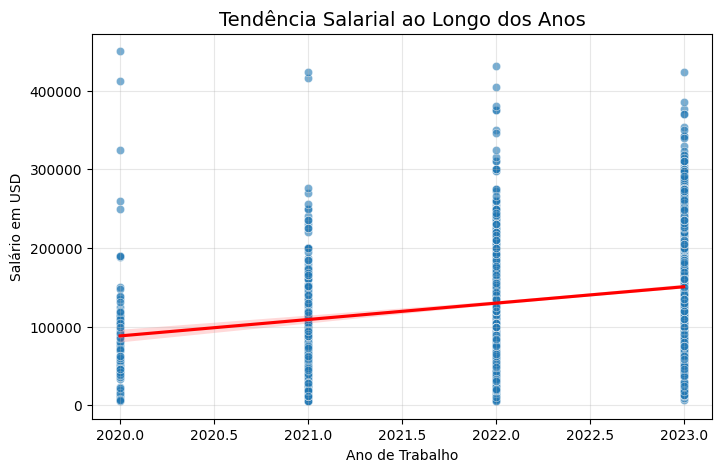

In [34]:
###TENDENCIA_SALARIAL_COM_OS_ANOS###
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="work_year",
    y="salary_in_usd",
    data=df_sel,
    alpha=0.6
)
sns.regplot(
    x="work_year",
    y="salary_in_usd",
    data=df_sel,
    scatter=False,
    color="red"
)
plt.title("Tendência Salarial ao Longo dos Anos", fontsize=14)
plt.xlabel("Ano de Trabalho")
plt.ylabel("Salário em USD")
plt.grid(True, alpha=0.3)
plt.show()

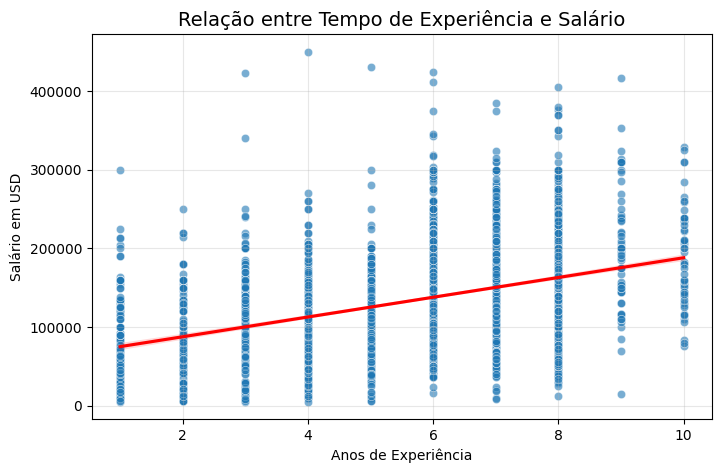

In [35]:
###RELAÇÃO_ENTRE_TEMPO_DE_EXPERIENCIA_E_SALARIO###
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="years_of_experience",
    y="salary_in_usd",
    data=df_sel,
    alpha=0.6
)
sns.regplot(
    x="years_of_experience",
    y="salary_in_usd",
    data=df_sel,
    scatter=False,
    color="red"
)
plt.title("Relação entre Tempo de Experiência e Salário", fontsize=14)
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário em USD")
plt.grid(True, alpha=0.3)
plt.show()